In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import pandas as pd
import os
import xarray as xr
import seaborn as sns

from n0_config_params import *
from n0bis_config_analysis_functions import *
from n0ter_stats import *

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
/home/jules/anaconda3/lib/python3.8/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.1, the latest is 0.2.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(
/home/jules/anaconda3/lib/python3.8/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.2, the latest is 0.5.3.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


# LOAD DATA

In [4]:
metric_list = ['HRV_MeanNN', 'HRV_SDNN', 'HRV_RMSSD', 'HRV_pNN50', 'HRV_SD1', 'HRV_SD2', 'HRV_S', 'HRV_HF', 'HRV_LF', 'HRV_LFHF', 'HRV_COV']

In [5]:
for sujet_i, sujet in enumerate(sujet_list):
    os.chdir(os.path.join(path_results, sujet, 'HRV'))
    if os.path.exists(f'{sujet}_df_hrv.xlsx'):

        if sujet_i == 0:
            df_allsujet = pd.read_excel(f'{sujet}_df_hrv.xlsx')
        else:
            df_allsujet = pd.concat((df_allsujet, pd.read_excel(f'{sujet}_df_hrv.xlsx')))

In [6]:
df_allsujet.index = np.arange(df_allsujet.index.shape[0])
df_allsujet = df_allsujet.drop(columns=['Unnamed: 0'])
df_allsujet

,sujet,cond,odor,HRV_MeanNN,HRV_SDNN,HRV_RMSSD,HRV_pNN50,HRV_SD1,HRV_SD2,HRV_S,HRV_HF,HRV_LF,HRV_LFHF,HRV_COV
0,01PD,FR_CV_1,o,842.719101,100.471919,58.219013,35.492958,41.166615,136.113163,17603.343231,0.011655,0.102813,8.821108,0.090476
1,01PD,FR_CV_1,+,946.681388,116.954153,83.041777,44.936709,58.711223,153.045747,28228.790355,0.036059,0.073977,2.051547,0.083333
2,01PD,FR_CV_1,-,910.826748,87.820194,67.578320,36.280488,47.784745,114.734556,17223.974950,0.032125,0.034801,1.083290,0.056769
3,01PD,MECA,o,949.740506,81.908074,48.982018,23.174603,34.634901,110.642551,12038.877869,0.006645,0.028950,4.356868,0.055901
4,01PD,MECA,+,957.980831,129.728100,120.393905,43.910256,85.130788,162.710935,43516.430989,0.030776,0.063194,2.053375,0.069530
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319,32CM,CO2,+,502.455611,34.901826,40.136930,1.845638,28.381095,40.433063,3605.086326,0.008356,0.005260,0.629471,0.020000
320,32CM,CO2,-,545.989071,53.667870,56.932922,14.781022,40.257644,64.405126,8145.517012,0.013999,0.003599,0.257116,0.044776
321,32CM,FR_CV_2,o,691.695150,168.719835,228.985585,46.527778,161.917256,175.606166,89327.003916,0.233865,0.127848,0.546674,0.069909
322,32CM,FR_CV_2,+,668.320713,92.039812,108.103125,47.098214,76.440338,105.486263,25331.935802,0.069160,0.017252,0.249454,0.074074


# CONDITION

['o', '+', '-']


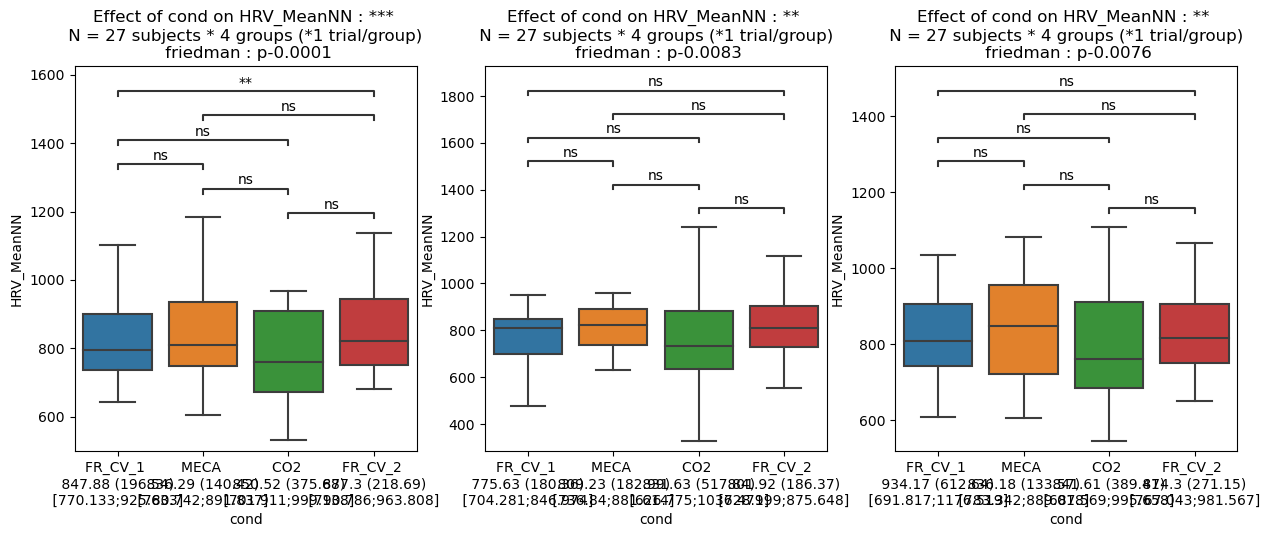

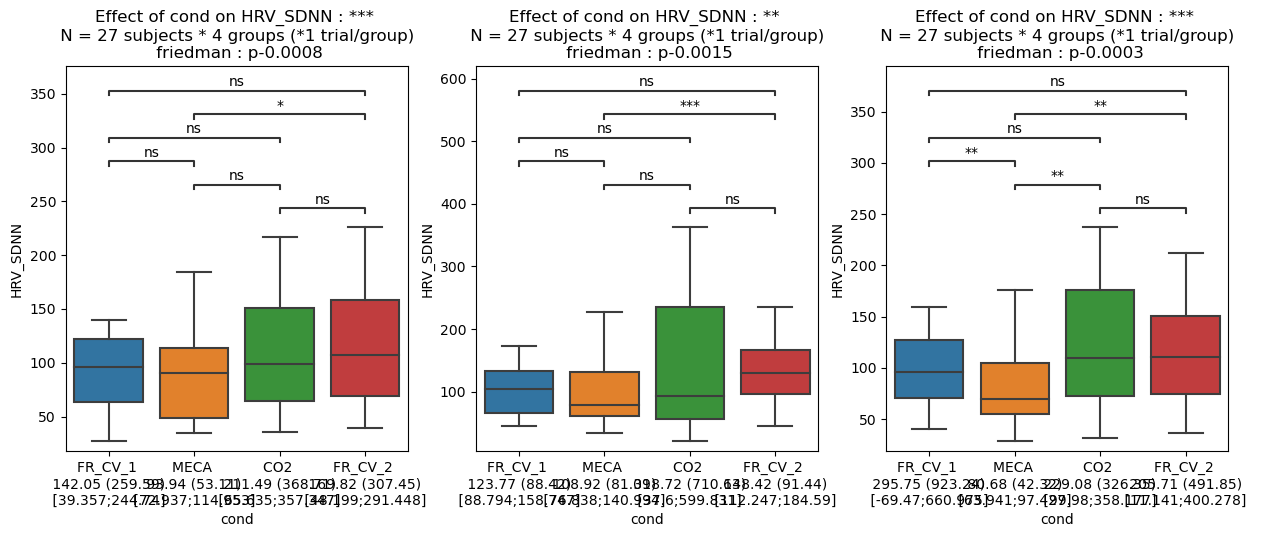

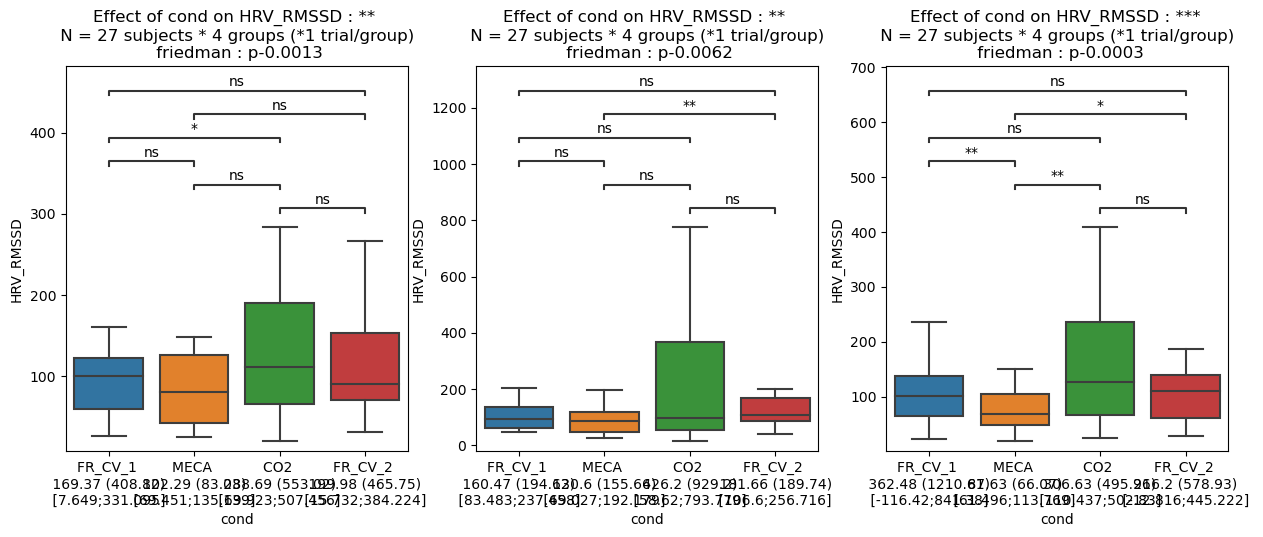

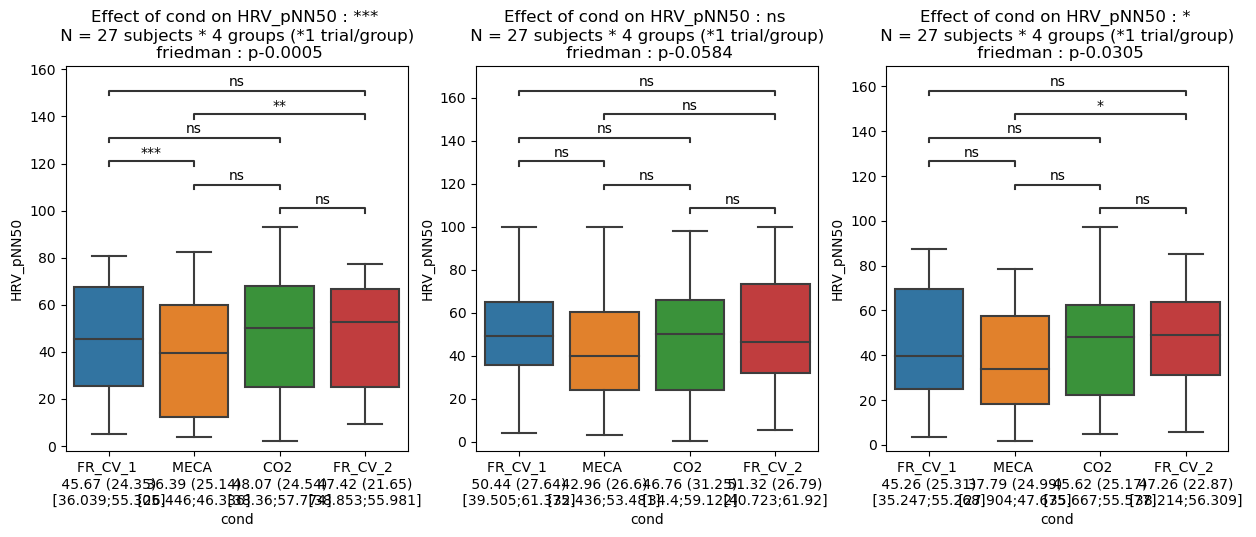

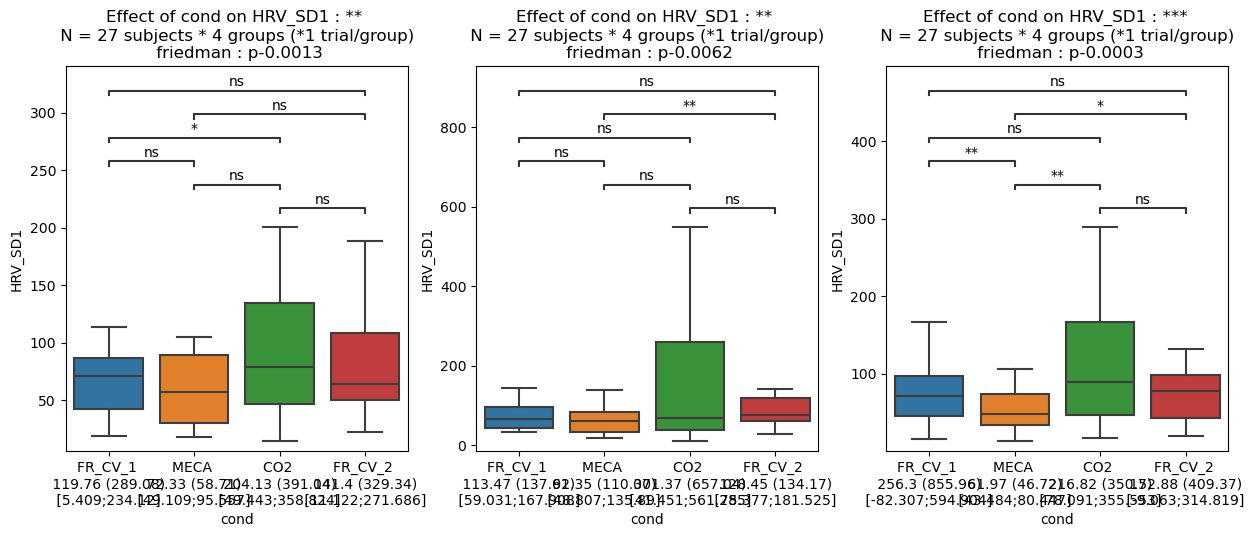

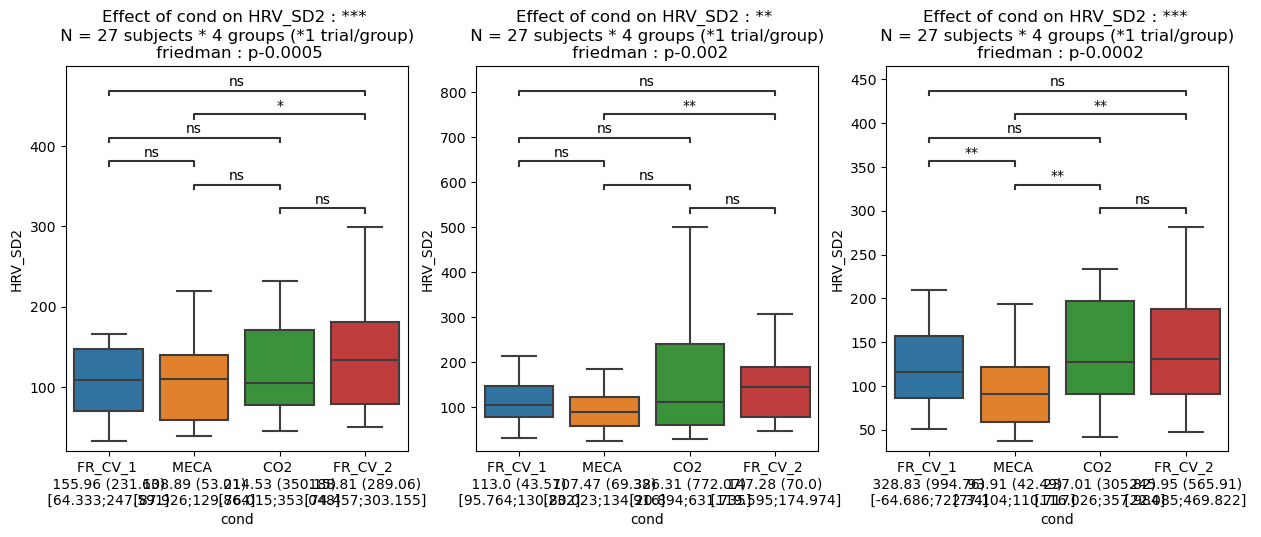

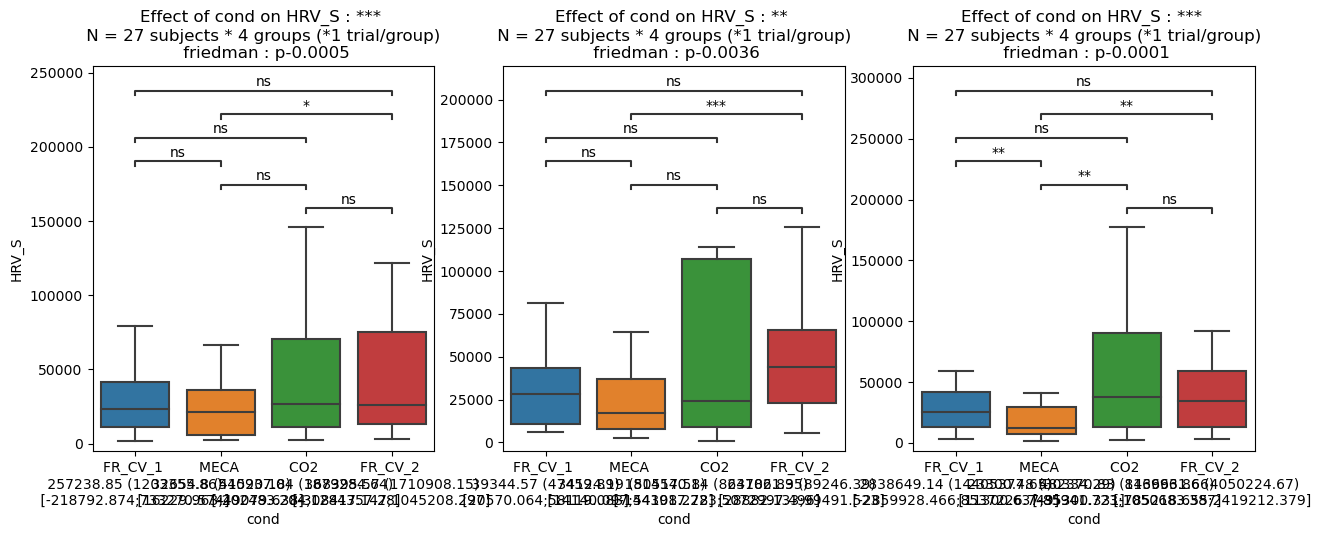

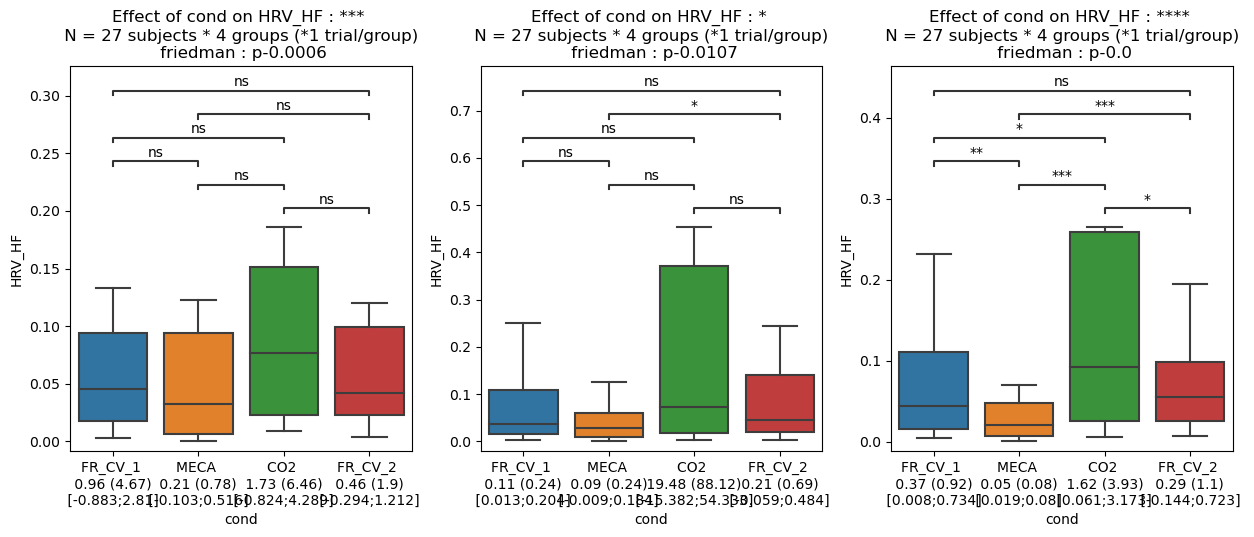

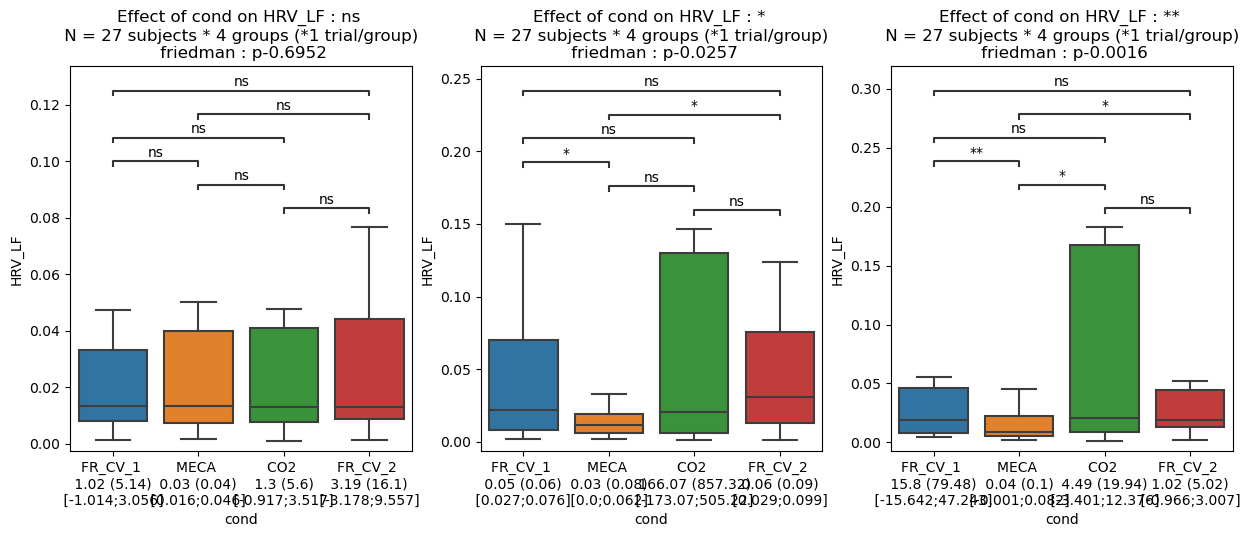

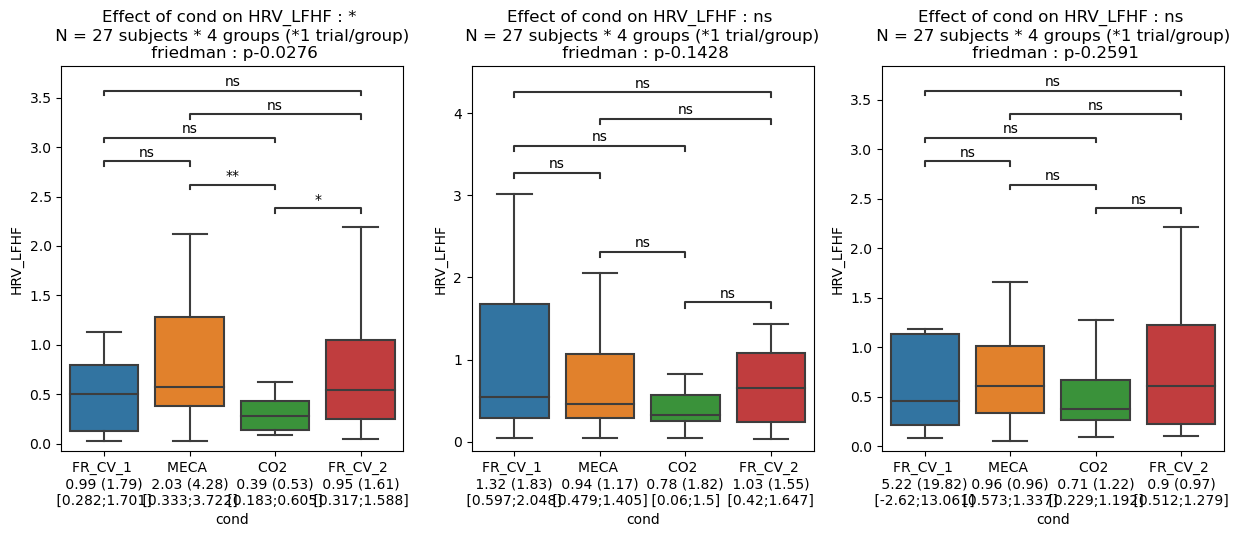

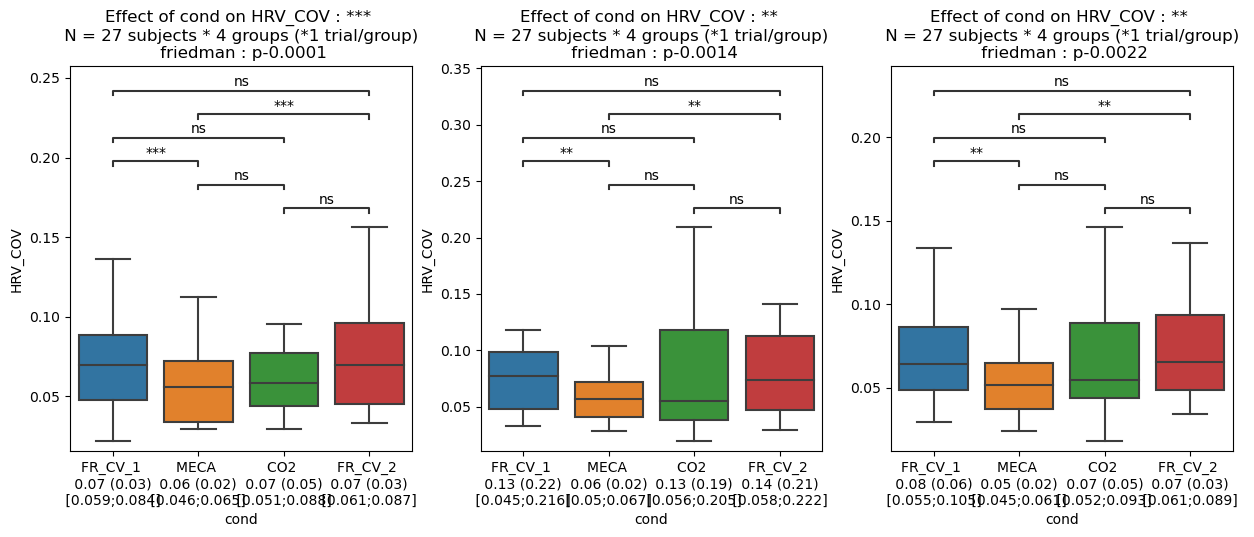

In [13]:
predictor = 'cond' 

print(odor_list)

for outcome_i in metric_list:

    fig, axs = plt.subplots(ncols=3)
    fig.set_figheight(5)
    fig.set_figwidth(15)

    for c, odor_i in enumerate(odor_list):
        
        ax = axs[c]
        df_stats = df_allsujet.query(f"odor == '{odor_i}'")
        auto_stats(df_stats, predictor, outcome_i, ax=ax, subject='sujet', design='within', mode='box', transform=False, verbose=True, order=None)


# ODOR

['FR_CV_1', 'MECA', 'CO2', 'FR_CV_2']


/home/jules/anaconda3/lib/python3.8/site-packages/pingouin/distribution.py:977: RuntimeWarning: divide by zero encountered in double_scalars
  W = np.product(eig) / (eig.sum() / d) ** d


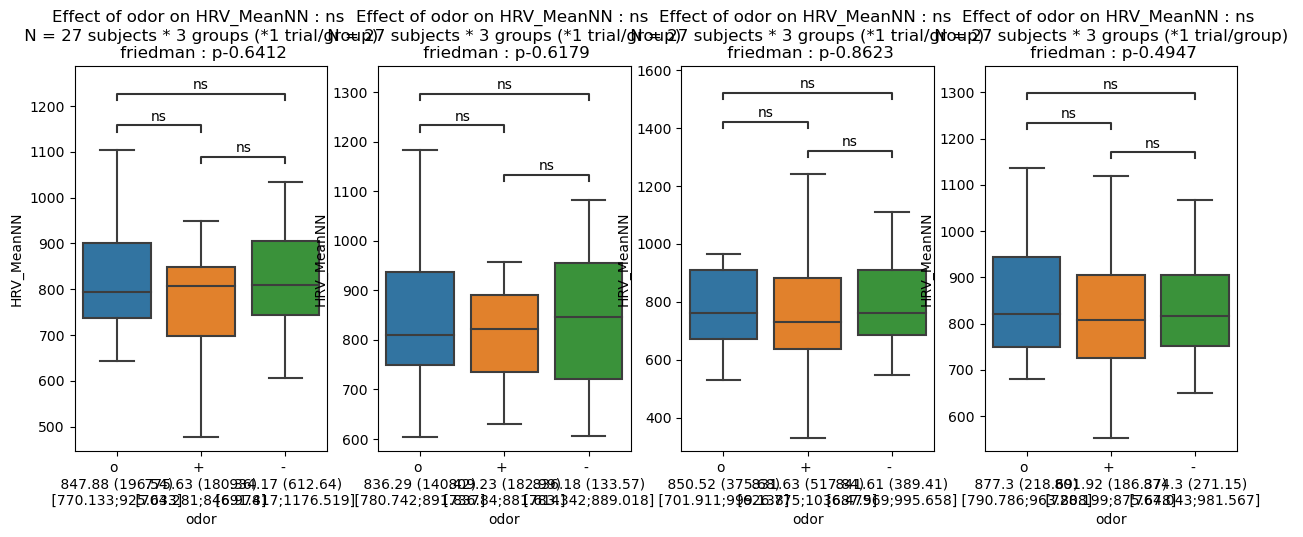

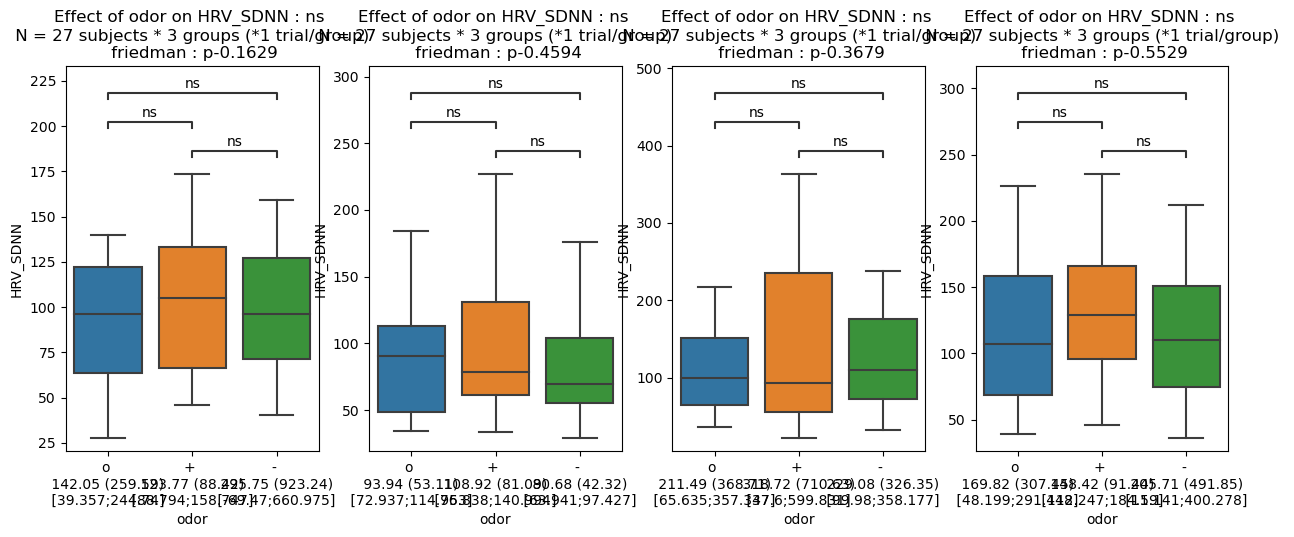

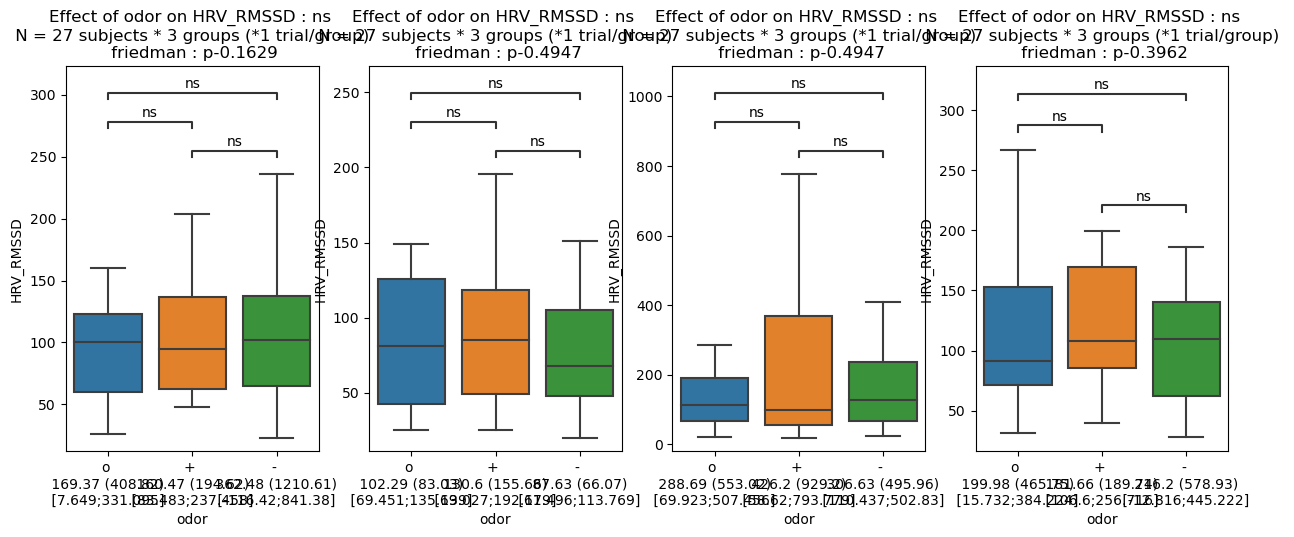

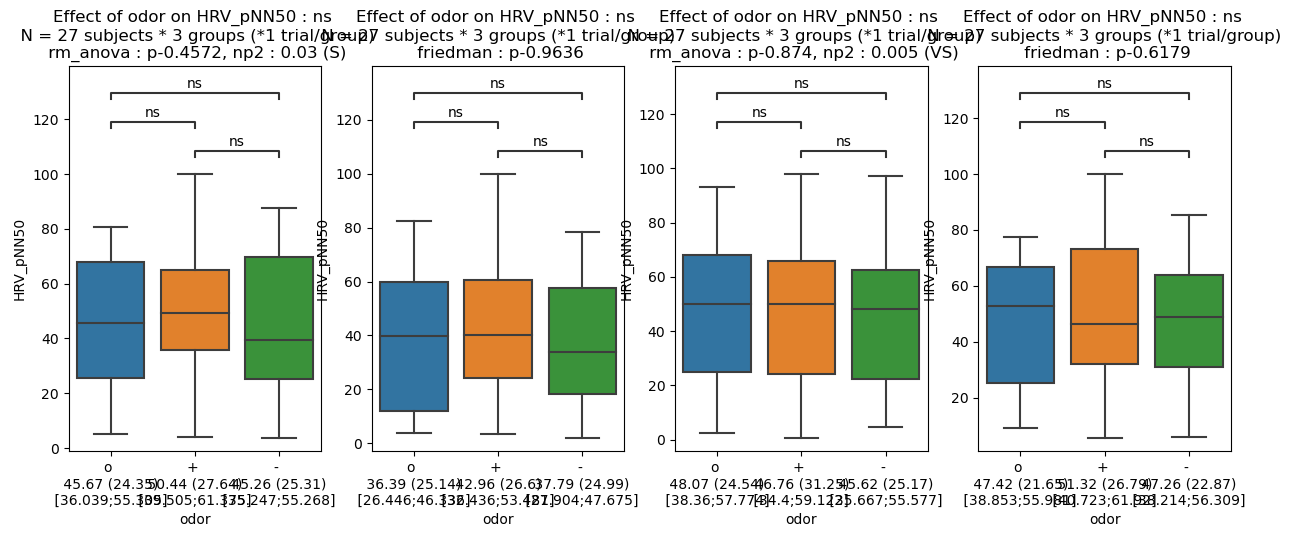

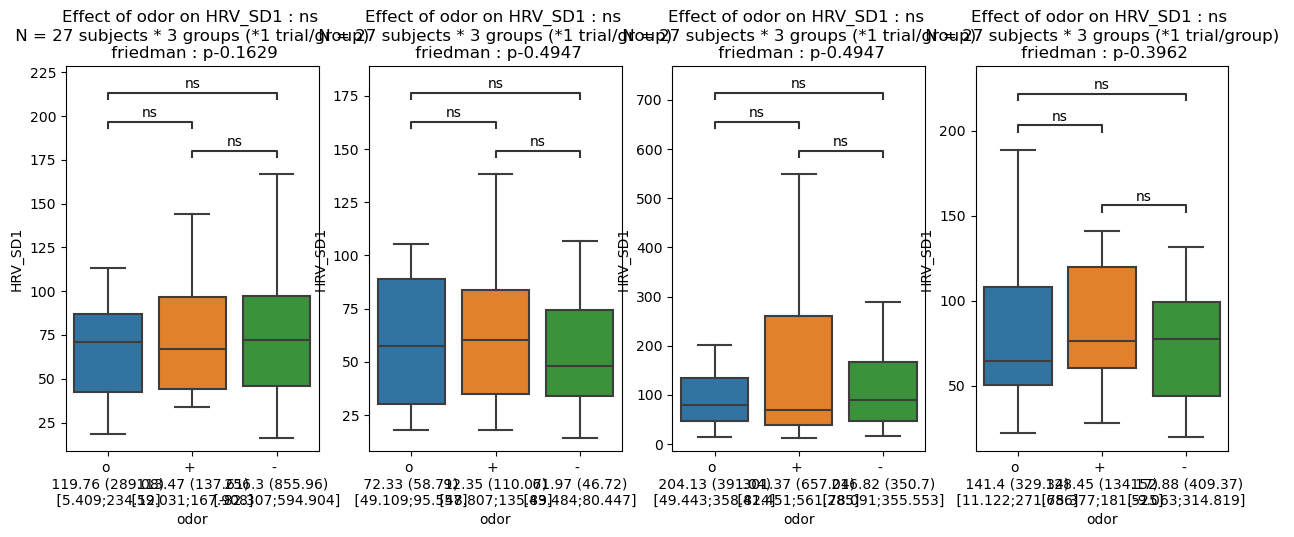

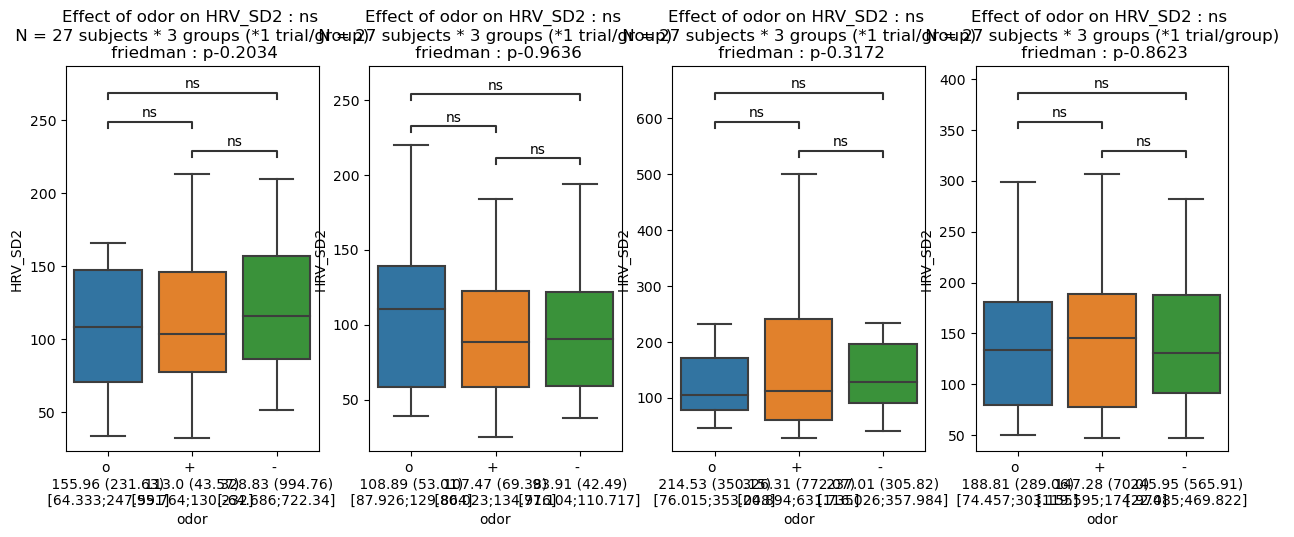

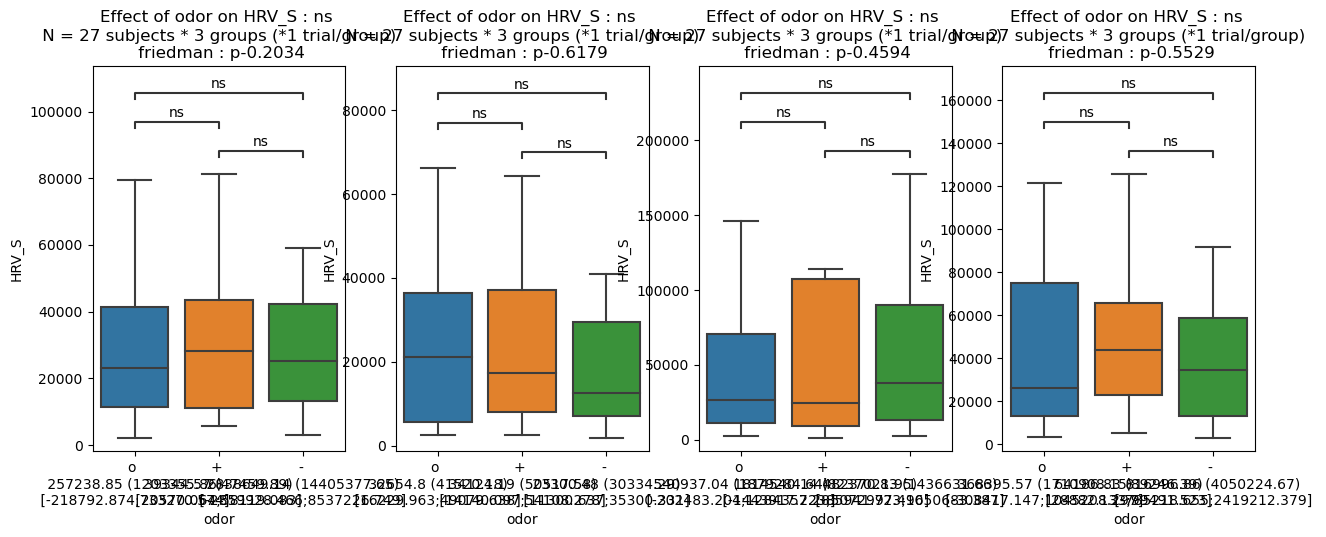

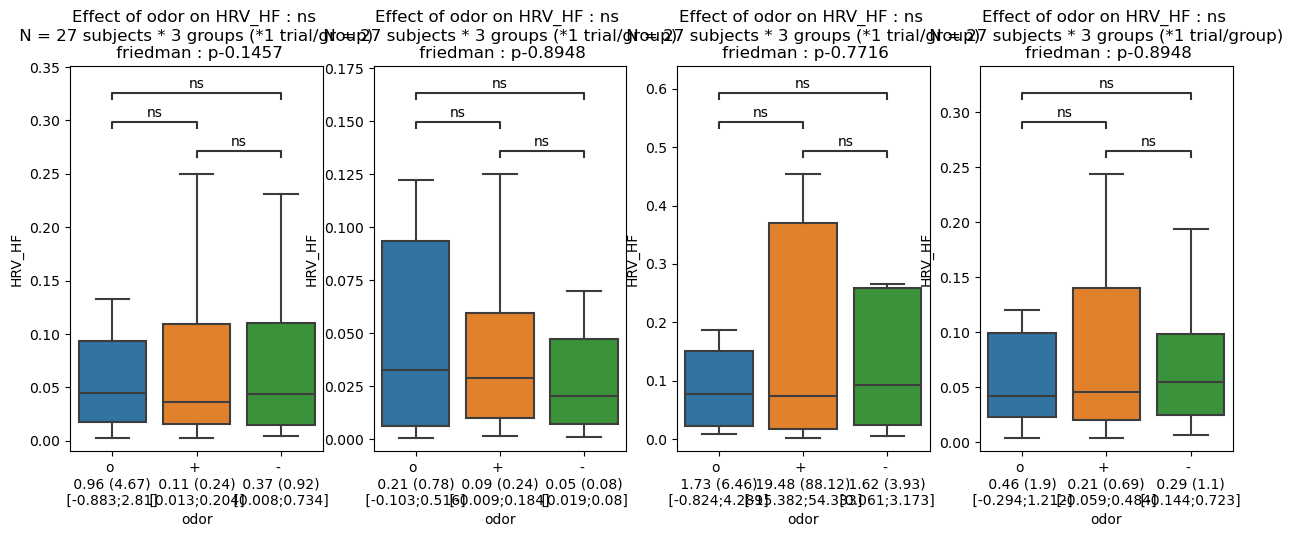

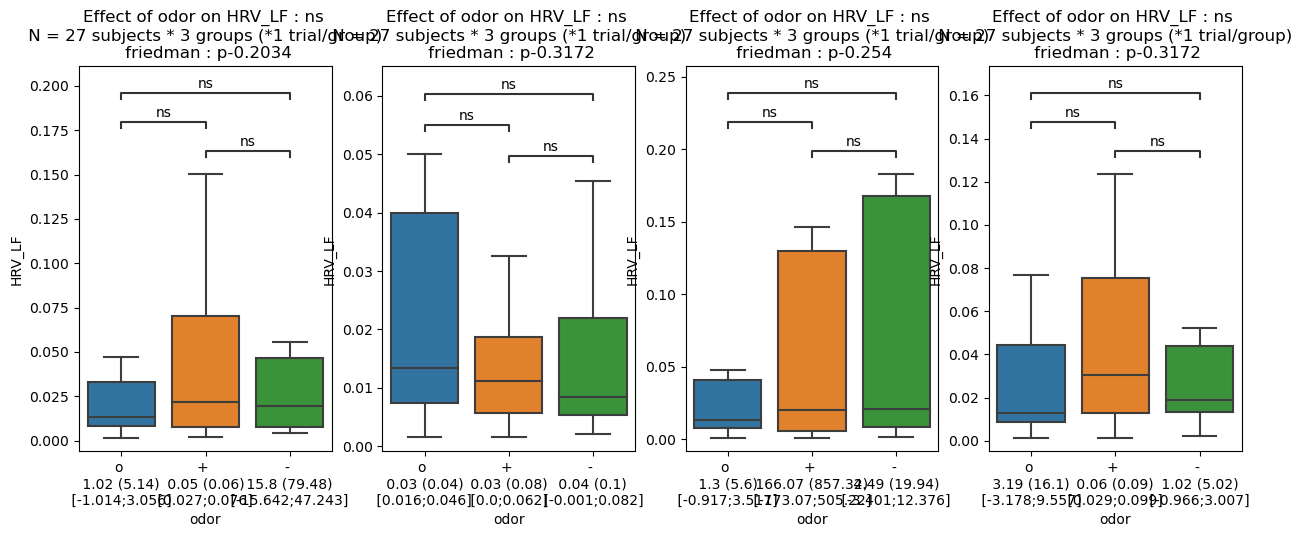

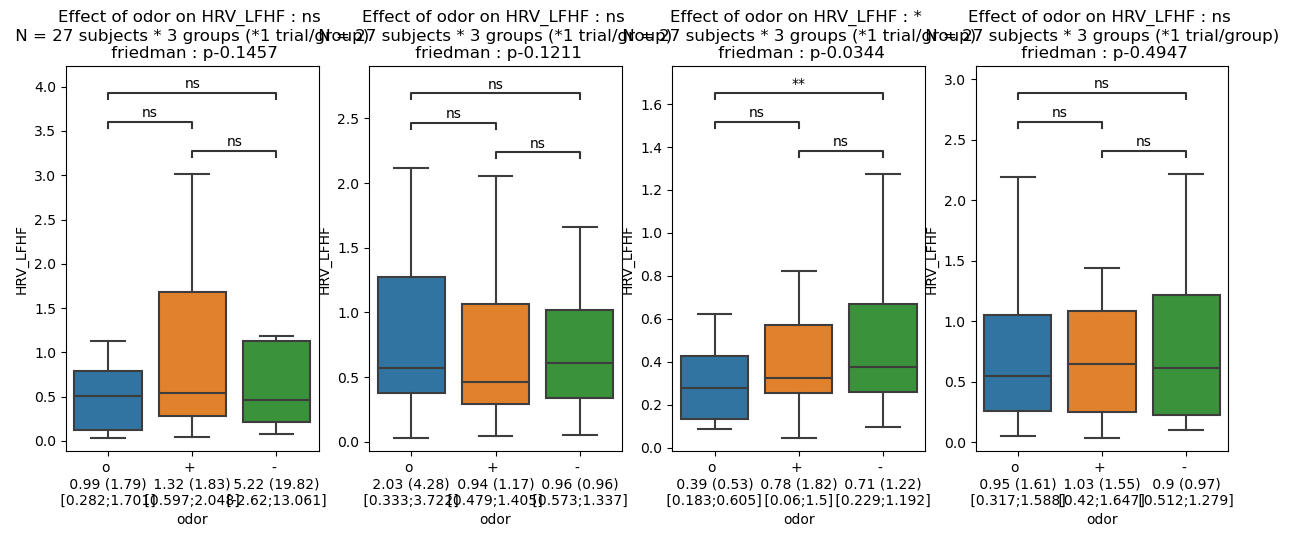

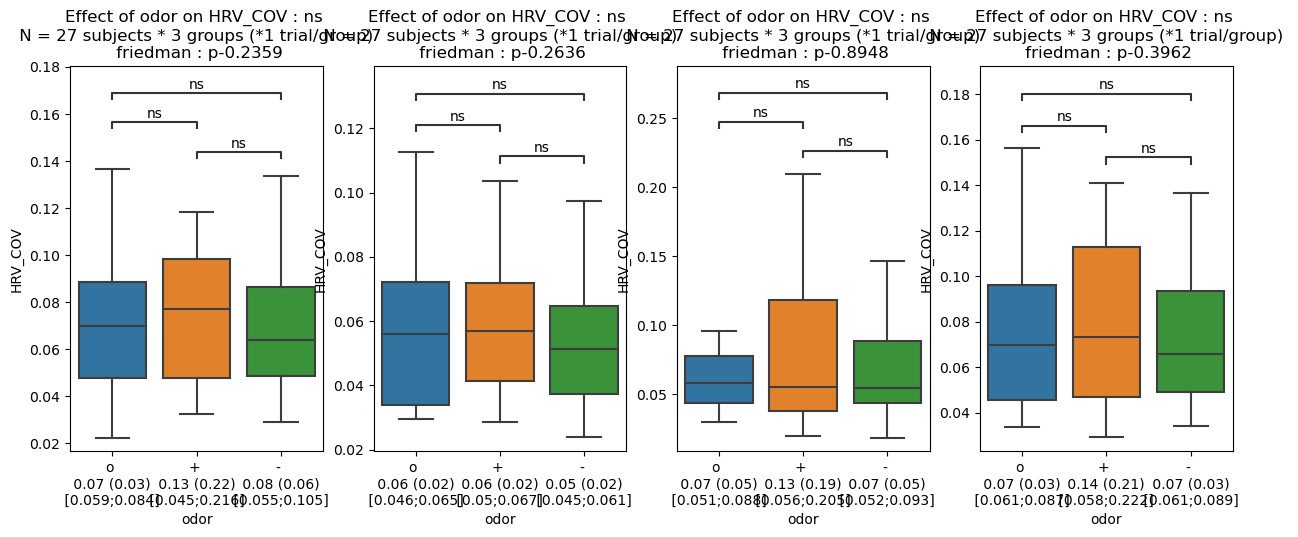

In [14]:
predictor = 'odor' 

print(conditions)

for outcome_i in metric_list:

    fig, axs = plt.subplots(ncols=4)
    fig.set_figheight(5)
    fig.set_figwidth(15)

    for c, cond in enumerate(conditions):
        
        ax = axs[c]
        df_stats = df_allsujet.query(f"cond == '{cond}'")
        auto_stats(df_stats, predictor, outcome_i, ax=ax, subject='sujet', design='within', mode='box', transform=False, verbose=True, order=None)

# FILTER GOOD SUBJECTS

In [41]:
sujet_best = {'FR_CV_1': np.array(['01PD', '04GB', '06EF', '13FP', '19TM', '23LF', '24TJ', '29SC', '31HJ']),
'MECA': np.array(['04GB', '19TM', '23LF', '29SC', '32CM']),
'CO2': np.array(['02MJ', '04GB', '05LV', '12BD', '19TM', '21ZV', '27BD', '29SC', '32CM']),
'FR_CV_2': np.array(['04GB', '12BD', '20TY', '22DI', '26MN', '29SC', '31HJ', '32CM'])}

In [39]:
sujet_best[cond].tolist()

['PD01', 'GB04', 'EF06', 'FP13', 'TM19', 'LF23', 'TJ24', 'SC29', 'HJ31']

/home/jules/anaconda3/lib/python3.8/site-packages/pingouin/distribution.py:977: RuntimeWarning: divide by zero encountered in double_scalars
  W = np.product(eig) / (eig.sum() / d) ** d
/home/jules/anaconda3/lib/python3.8/site-packages/pingouin/distribution.py:977: RuntimeWarning: divide by zero encountered in double_scalars
  W = np.product(eig) / (eig.sum() / d) ** d
/home/jules/anaconda3/lib/python3.8/site-packages/pingouin/distribution.py:977: RuntimeWarning: divide by zero encountered in double_scalars
  W = np.product(eig) / (eig.sum() / d) ** d
/home/jules/anaconda3/lib/python3.8/site-packages/pingouin/distribution.py:977: RuntimeWarning: divide by zero encountered in double_scalars
  W = np.product(eig) / (eig.sum() / d) ** d


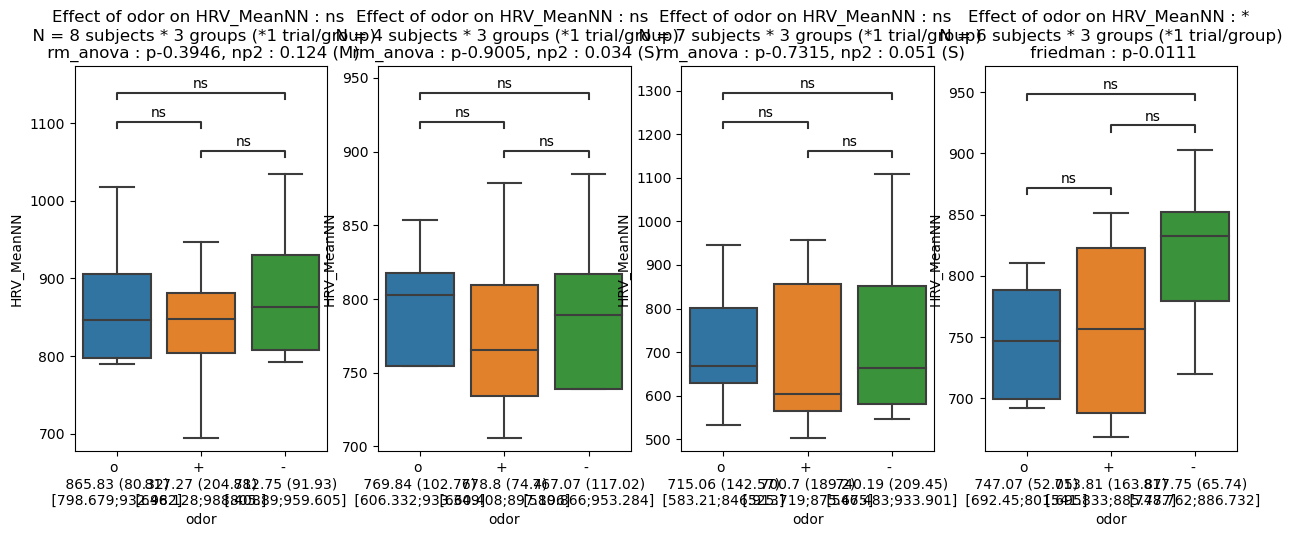

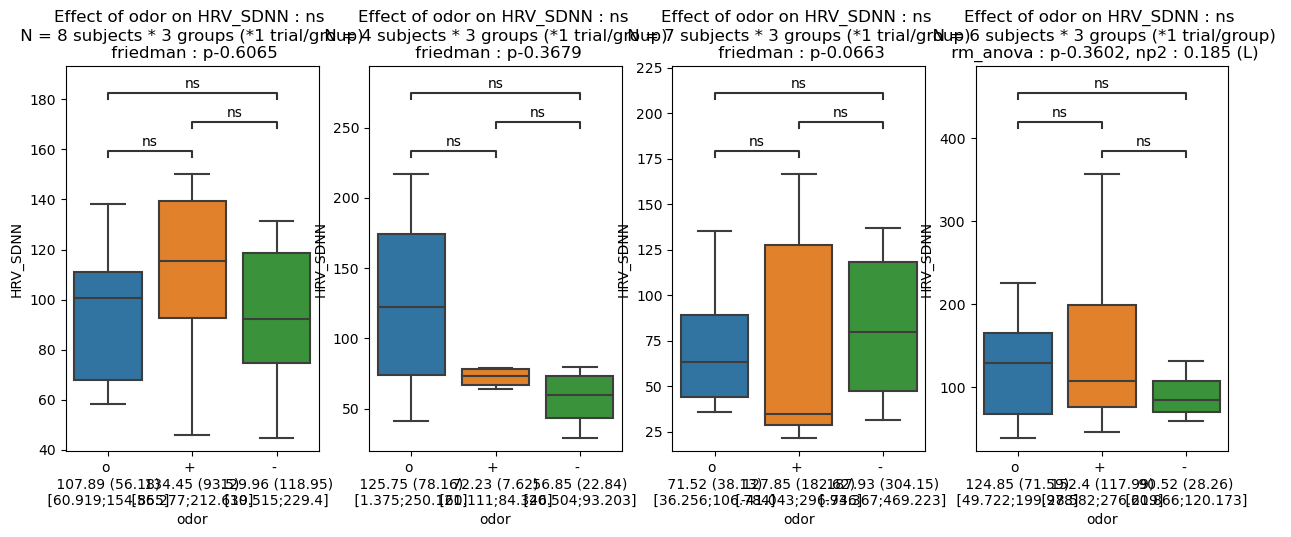

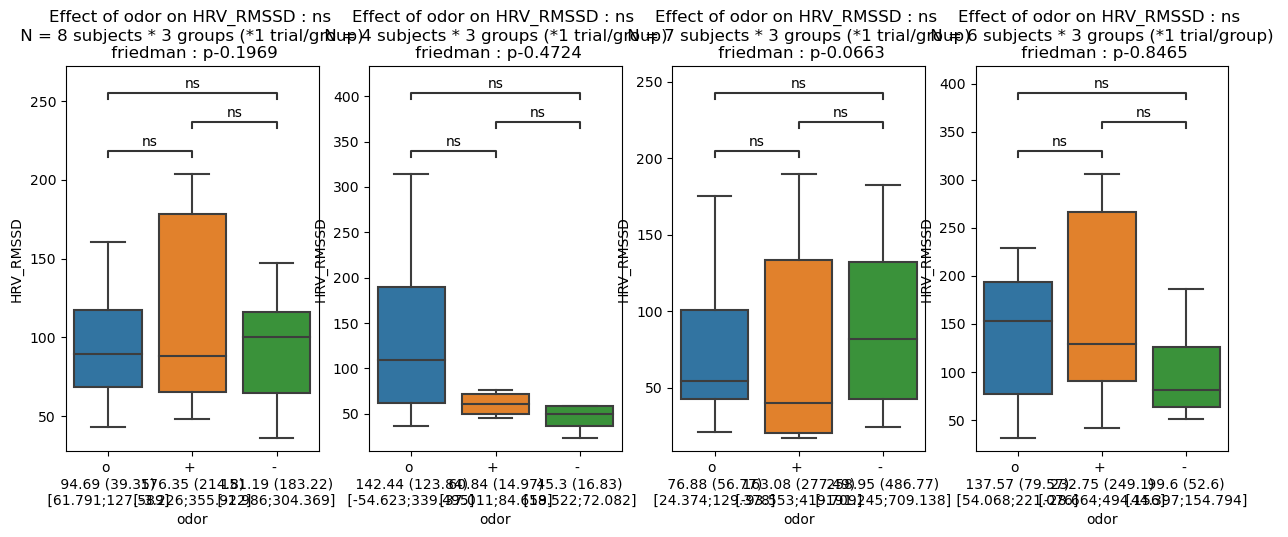

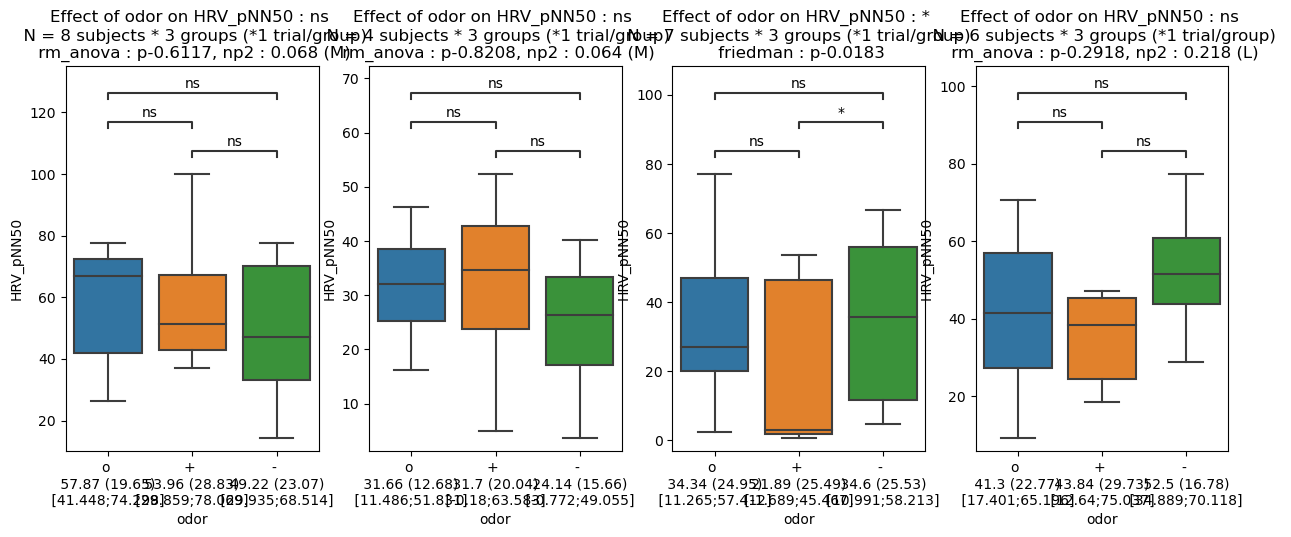

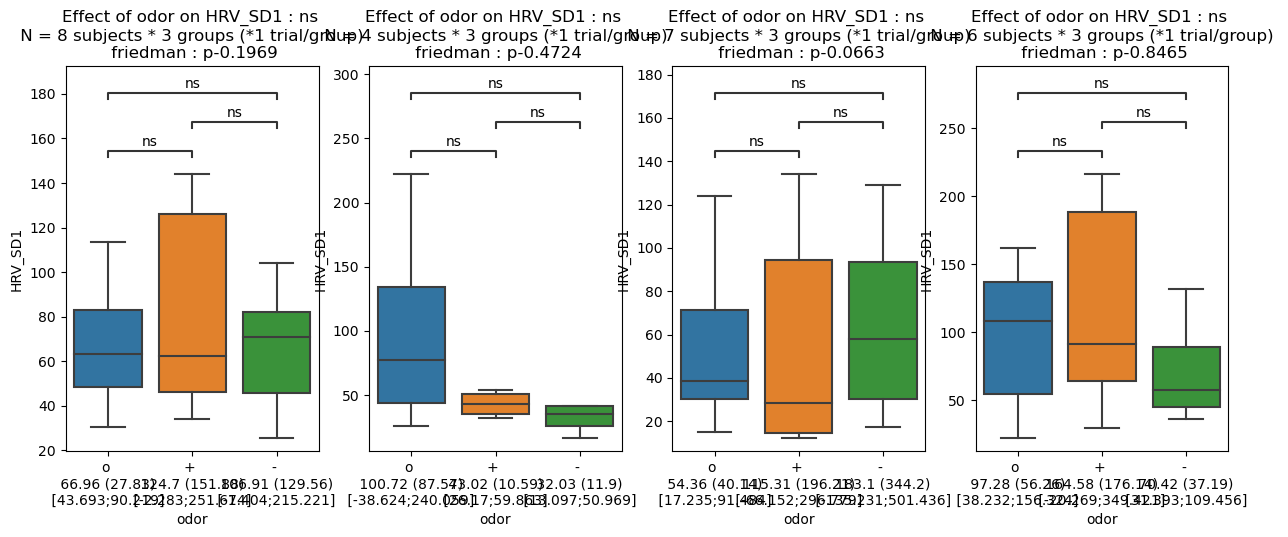

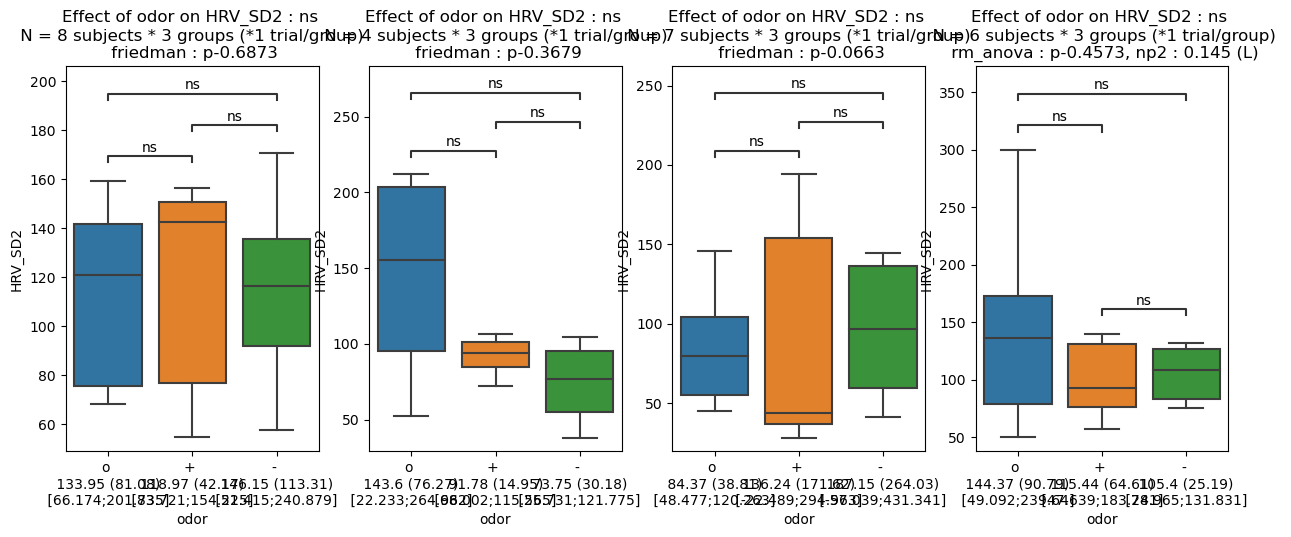

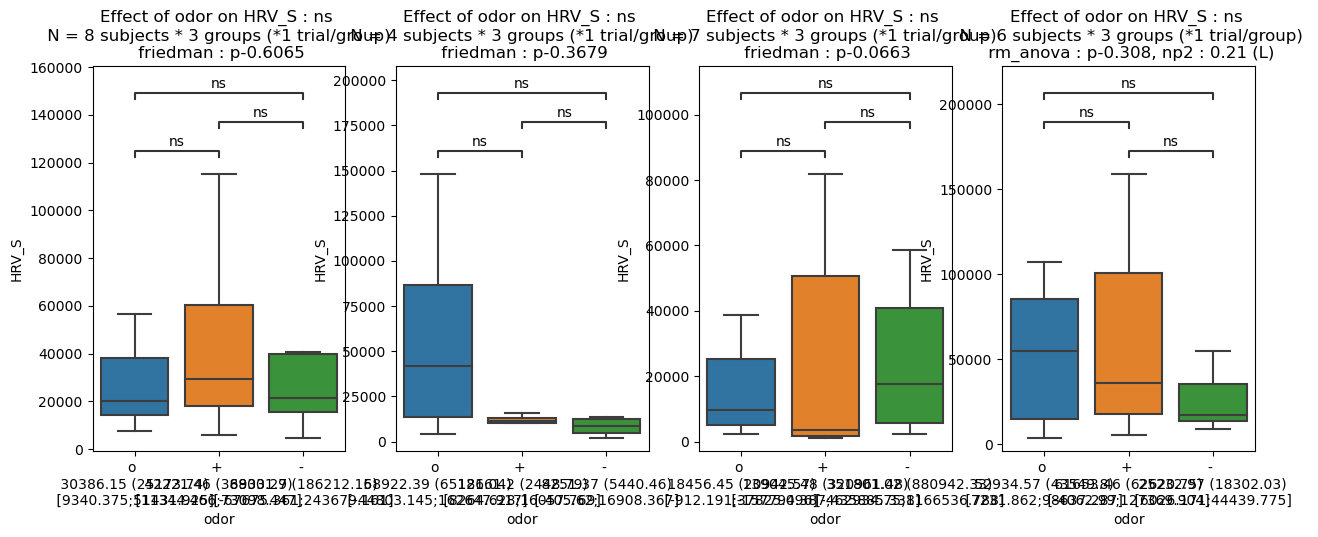

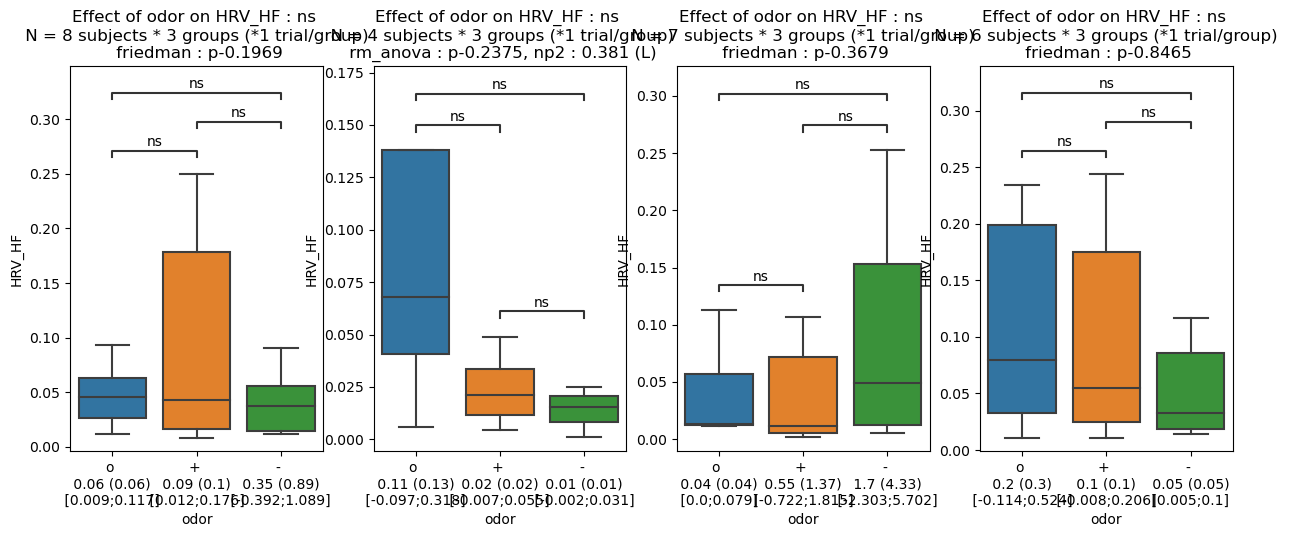

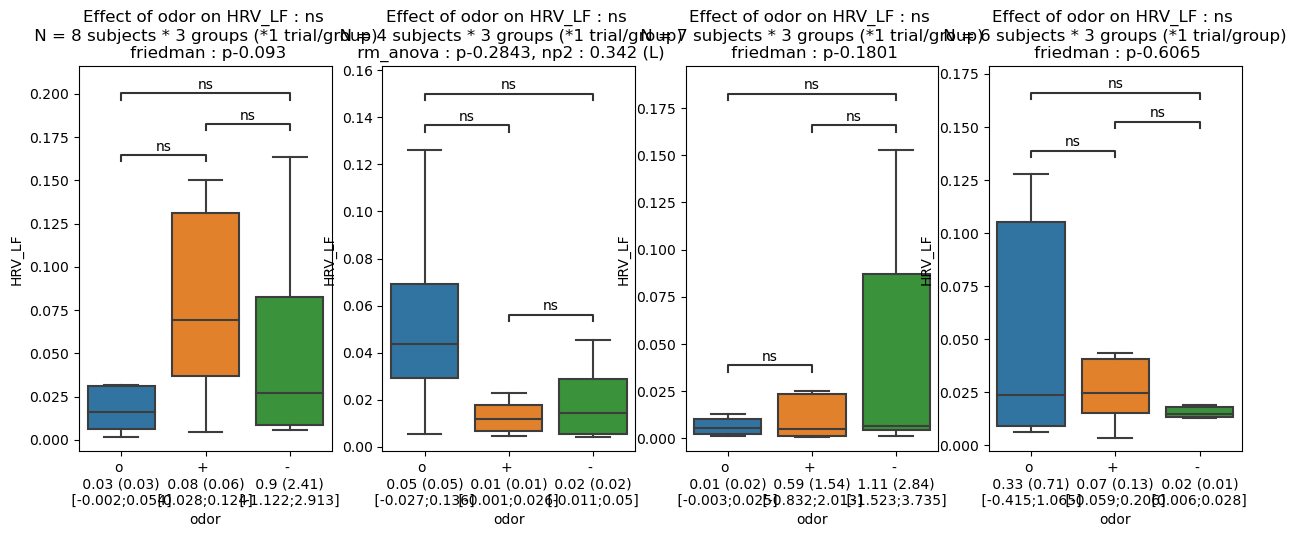

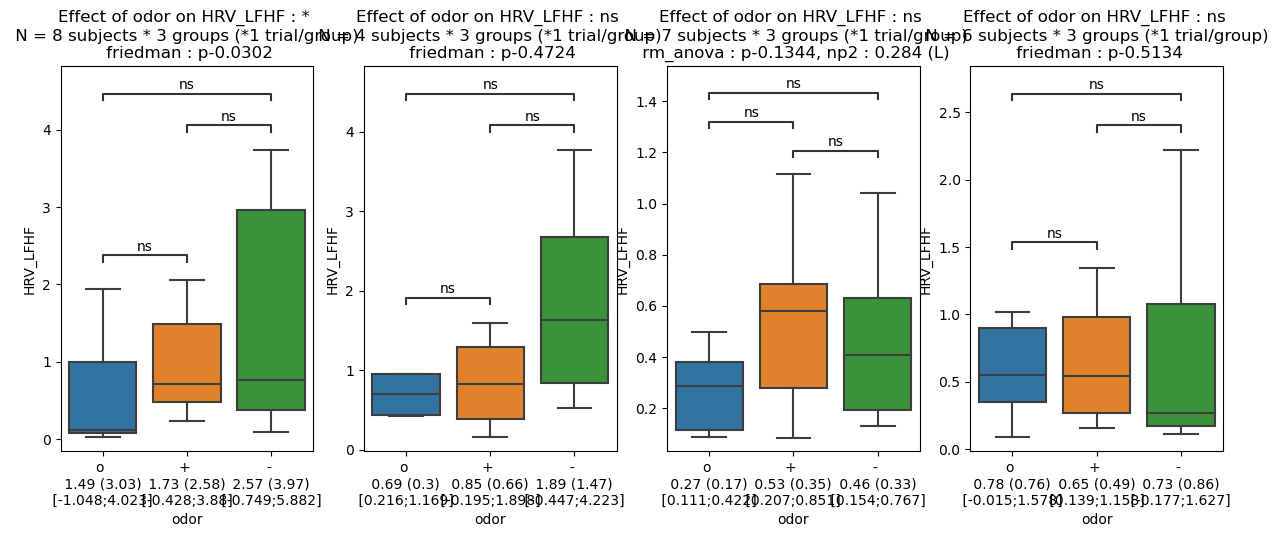

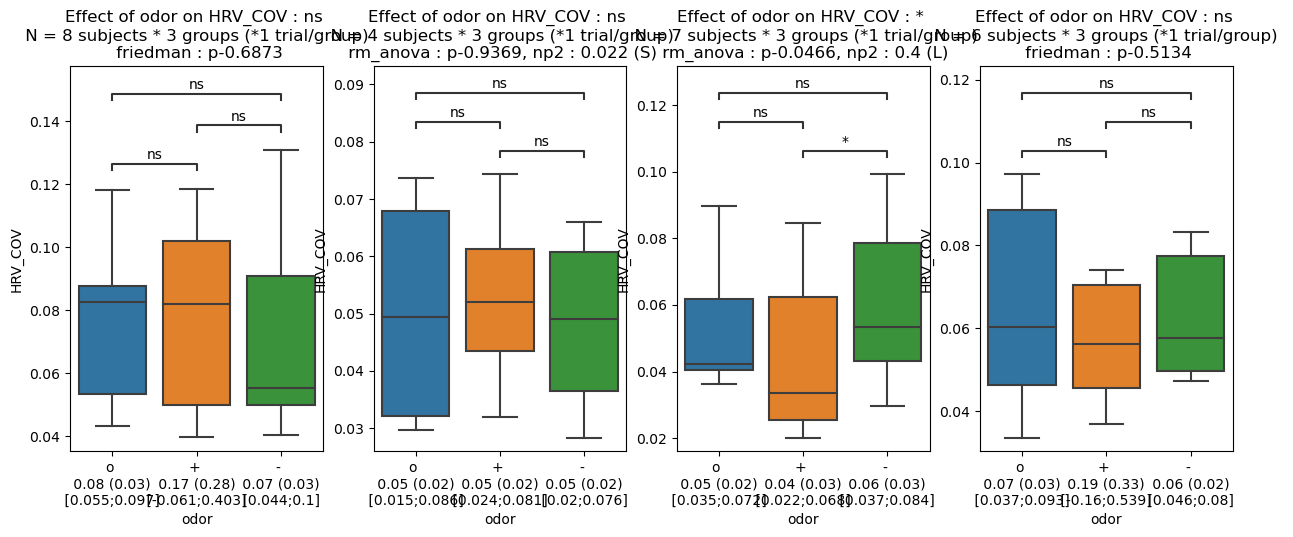

In [42]:
predictor = 'odor' 

for outcome_i in metric_list:

    fig, axs = plt.subplots(ncols=4)
    fig.set_figheight(5)
    fig.set_figwidth(15)

    for c, cond in enumerate(conditions):
        
        ax = axs[c]
        df_stats = df_allsujet.query(f"cond == '{cond}' & sujet in {sujet_best[cond].tolist()}")
        auto_stats(df_stats, predictor, outcome_i, ax=ax, subject='sujet', design='within', mode='box', transform=False, verbose=True, order=None)